## <font color='blue'>SME0221 - Introdução à Inferência Estatística</font>

## <font color='blue'>Análise de Regressão Múltipla</font>

**Vileno Cunha Cavalcante**<br>
**nº USP: 12559249**

# Análise de Regressão Múltipla

A regressão múltipla é uma técnica estatística que visa estudar a relação entre uma variável dependente e duas ou mais variáveis independentes.

**Equação de Regressão Múltipla:**

A equação de regressão múltipla pode ser expressa como:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon $$

Onde:

- $ Y $ é a variável dependente.

- $ X_1, X_2, \ldots, X_p $ são as variáveis independentes.

- $ \beta_0 $ é o intercepto (valor de $ Y $ quando todas as variáveis independentes são zero).

- $ \beta_1, \beta_2, \ldots, \beta_p $ são os coeficientes de regressão, que representam a mudança média em $ Y $ associada a uma unidade de mudança em $ X_i $, mantendo todas as outras variáveis constantes.

- $ \epsilon $ é o erro aleatório, que captura a variação não explicada por $ X_1, X_2, \ldots, X_p $.

###Estimação dos Coeficientes:
Os coeficientes $ \beta_0, \beta_1, \ldots, \beta_p $ são estimados usando métodos como o Método dos Mínimos Quadrados Ordinários (OLS), que minimiza a soma dos quadrados dos resíduos $ \epsilon $.

###Interpretação dos Coeficientes:

- $ \beta_0 $: Intercepto da linha de regressão, o valor de $ Y $ quando todas as variáveis independentes são zero.

- $ \beta_i $ para $ i = 1, 2, \ldots, p $: Indicam a mudança esperada em $ Y $ para cada unidade de mudança em $ X_i $, mantendo todas as outras variáveis constantes.

###Suposições para Regressão Múltipla

- **Linearidade:** A relação entre as variáveis independentes e a variável dependente é linear.

- **Homoscedasticidade:** A variância dos erros é constante para todos os valores das variáveis independentes.

- **Normalidade dos Erros:** Os erros de previsão seguem uma distribuição normal.

- **Ausência de Multicolinearidade:** As variáveis independentes não são altamente correlacionadas entre si.

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Carregar e Explorar os Dados:

Vamos utilizar um conjunto de dados fictício que simula a relação entre a satisfação dos funcionários (variável dependente) e duas variáveis independentes: salário e número de horas trabalhadas por semana.

In [ ]:
# Gerando dados simulados
np.random.seed(0)
n = 100
salario = np.random.normal(50000, 10000, n) # Salário anual
horas_trabalhadas = np.random.normal(40, 5, n) # Horas trabalhadas por semana
satisfacao = 0.5 * salario + 0.8 * horas_trabalhadas + np.random.normal(0, 10000, n)

# Criando o DataFrame
dados = pd.DataFrame({
    'Salario': salario,
    'Horas_Trabalhadas': horas_trabalhadas,
    'Satisfacao': satisfacao
})

# Explorando os dados
print(dados.describe())

            Salario  Horas_Trabalhadas    Satisfacao
count    100.000000         100.000000    100.000000
mean   50598.080155          40.410065  24739.045524
std    10129.597693           5.199397  11161.759786
min    24470.101842          28.882984  -2047.738100
25%    43561.433178          36.272851  17779.621736
50%    50940.961194          40.123274  24875.068178
75%    57370.773529          44.237399  31807.188996
max    72697.546240          51.915724  50291.553828


#Construção do Modelo

O modelo estima os coeficientes $\beta_0$, $\beta_1$ (para Salario) e $\beta_2$ (para Horas Trabalhadas) conforme definido na equação de regressão.

- Ajustar o modelo de regressão múltipla.
- Avaliar os coeficientes estimados e a significância das variáveis independentes.


O modelo de regressão indica que Salario é um preditor significativo da Satisfacao, enquanto Horas Trabalhadas não parece ser significativo.

In [ ]:
# Ajustando o modelo de regressão múltipla
X = dados[['Salario', 'Horas_Trabalhadas']]
X = sm.add_constant(X) # Adicionando constante para o intercepto
y = dados['Satisfacao']

modelo = sm.OLS(y, X).fit() # Ajustando o modelo
print(modelo.summary()) # Gera informações sobre os dados

                            OLS Regression Results                            
Dep. Variable:             Satisfacao   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     18.04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           2.18e-07
Time:                        22:57:38   Log-Likelihood:                -1057.6
No. Observations:                 100   AIC:                             2121.
Df Residuals:                      97   BIC:                             2129.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7552.2904   8580.14

#Verificação de Suposições:

- Verificar a linearidade da relação entre as variaveis independentes
- Análise gráfica


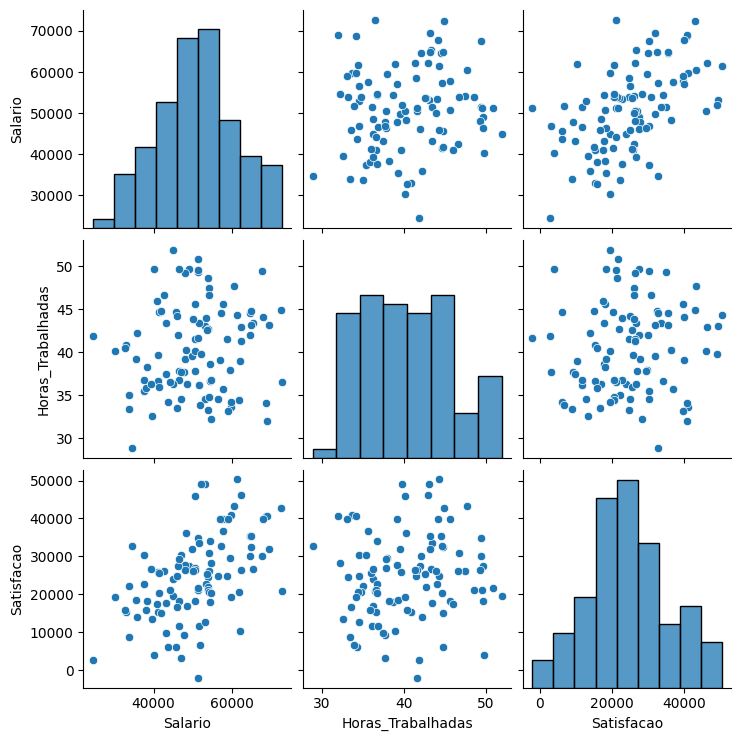

In [ ]:
# Plotando scatter plots para verificar a linearidade
sns.pairplot(dados)
plt.show()

#Verificação da Multicolinearidade

Os valores de VIF fornecem evidências de que não há problemas de multicolinearidade significativos entre Salario e Horas Trabalhadas. Ambos os VIFs estão próximos de 1, sugerindo que cada variável é independente e não tem uma relação linear forte com as outras variáveis independentes no modelo. Isso é um bom sinal, pois significa que as estimativas dos coeficientes de regressão são confiáveis e não inflacionadas pela multicolinearidade.

In [ ]:
# Verificando a multicolinearidade (Que é a relação entre as variaveis independentes)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0              const  79.434351
1            Salario   1.012641
2  Horas_Trabalhadas   1.012641


#Análise dos Resíduos
A média dos resíduos é próxima de zero, o que é bom. No entanto, o desvio padrão é bastante alto, indicando variabilidade nos erros de predição.

count    1.000000e+02
mean    -2.040906e-11
std      9.529247e+03
min     -2.728466e+04
25%     -5.100465e+03
50%      3.028788e+02
75%      6.235226e+03
max      2.358601e+04
dtype: float64


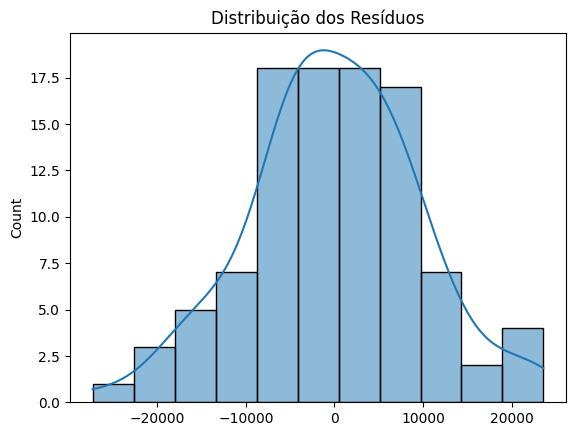

In [ ]:
# Analisando os resíduos
residuos = modelo.resid
sns.histplot(residuos, kde=True)
print(residuos.describe())
plt.title('Distribuição dos Resíduos')
plt.show()

#Resíduos vs Valores Ajustados

No gráfico abaixo, sugere que a variância dos resíduos pode aumentar ligeiramente à medida que os valores ajustados aumentam. Isso pode indicar que a homoscedasticidade não é perfeita. No entanto, a inclinação da linha azul é pequena, então a violação da homoscedasticidade pode não ser significativa.

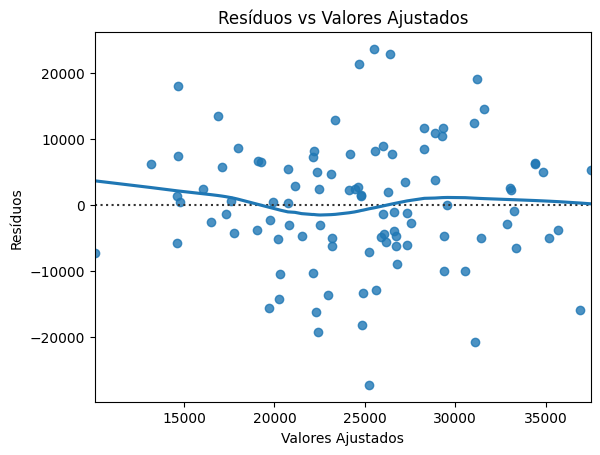

In [ ]:
# Plotando resíduos vs valores ajustados para verificar homoscedasticidade
sns.residplot(x=modelo.fittedvalues, y=residuos, lowess=True)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()